In [84]:
from nltk import sent_tokenize, pos_tag
from nltk.tokenize import TreebankWordTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet as wn
from nltk.corpus import sentiwordnet as swn
from nltk.sentiment.util import mark_negation
from string import punctuation
from IPython.display import display
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

### Sentiment Scoring Using SentiWordNet

In [85]:
def penn_to_wn(tag):
    """
        Convert between the PennTreebank tags to simple Wordnet tags
    """
    if tag.startswith('J'):
        return wn.ADJ
    elif tag.startswith('N'):
        return wn.NOUN
    elif tag.startswith('R'):
        return wn.ADV
    elif tag.startswith('V'):
        return wn.VERB
    return None

In [86]:
def get_sentiment_score(text):
    
    """
        This method returns the sentiment score of a given text using SentiWordNet sentiment scores.
        input: text
        output: numeric (double) score, >0 means positive sentiment and <0 means negative sentiment.
    """    
    total_score = 0
    #print(text)
    raw_sentences = sent_tokenize(text)
    #print(raw_sentences)
    
    for sentence in raw_sentences:

        sent_score = 0     
        sentence = str(sentence)
        #print(sentence)
        sentence = sentence.replace("<br />"," ").translate(str.maketrans('','',punctuation)).lower()
        tokens = TreebankWordTokenizer().tokenize(text)
        tags = pos_tag(tokens)
        for word, tag in tags:
            wn_tag = penn_to_wn(tag)
            if not wn_tag:
                continue
            lemma = WordNetLemmatizer().lemmatize(word, pos=wn_tag)
            if not lemma:
                continue
            synsets = wn.synsets(lemma, pos=wn_tag)
            if not synsets:
                continue
            synset = synsets[0]
            swn_synset = swn.senti_synset(synset.name())
            sent_score += swn_synset.pos_score() - swn_synset.neg_score()

        total_score = total_score + (sent_score / len(tokens))

    res = (total_score / len(raw_sentences)) * 100
    
    return res

In [87]:
reviews = pd.read_csv("../data/small_corpus.csv")

In [88]:
reviews.shape

(4500, 12)

In [89]:
reviews.head()

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,style,image
0,1.0,True,"12 30, 2009",A1ZI4YAGHTZ698,B002L7GKXG,andrzej raczynski,"Couldn't get my Amazon copy to install, securom error about not an original disc. Contacted securom and gave them the disc serial info and they confirmed that it was part of a bad batch of discs. Suggested I don't buy from Amazon as they probably have a large batch of bad ones.\n\nTake it for what it's worth, they could be 'through' the bad batch already, or not.",There's bad discs out there.,1262131200,8,{'Format:': ' CD-ROM'},NaN
1,1.0,False,"05 28, 2003",A37D2BPGCF1N89,B00006IJO5,Walt,"[...]\nSystem Specs\nP4 1.9\n256MB Ram\nGeForce 4 64MB IT\nCable Internet\nNot exactly top of the line but I had to turn all of the graphical options to very low or off.\nSystem Specs\nP4 1.8\n512MB Ram\nGeForce 4 IT 128 MB\nCable Internet\nThis one has a better video card and more ram but I was able to bring the settings up to High. In group combat (9 players vs. NPCs) however, server lag kills.\nPros:\n- Breathtaking graphics\n- Monthly updates\n- Able to unlearn spells\nCons:\n- No real content. Story quest limited to 13. After which you can get a scarce quest here and there.\n- No NPC venders. NPCs are only there for quest.\n- No use for money except learning smith and whatnot.\n- Breathtaking graphics if you have a 128mb video card (Radeon 9700)\n- Monthly updates are always an anticlimax.\n- Authentication problems when logging on.\n- Massive lag if you are fighting with a group of 9.\n- Groups are limited to 9 players [...]\n- PKers are able to camp zone spots.\n- MOST of the game's population has a character at level +40\n- The level cap is limited at 50 and will not be removed until September at the earliest.\n- Lack of In-Game Admin support.\n- No point in towns because there is nothing to do there.\n- NPC mobs all look the same but are given different names and strengths.\n- Waste of [$$$]",If I can save one person from buying this game...,1054080000,10,NaN,NaN
2,1.0,False,"03 9, 2010",AB8GFV7U2F6QP,B00149Y1G0,HardcoreGamer,"After playing Dirt, I could hardly wait to get into this game.\nI prefer realism and realistic cars and driving. What this is is\nanother excellent example of what's wrong with the racing genre.\n\n THE GOOD:\n Graphics, sounds, detail, cars (interior and exterior)\n Menu System\n\n THE BAD:\n Virtually unplayable with driving aids turned off\n Pedal sensitivity and feel , even with saturation turned down\n Steering lag\n Bump-n-Grind (The other cars smash each other (and you) around\n the track like a demolition derby!)\n Narrator in your ear all the time (very annoying)\n Car slides around like it was on ice, can burnout from a standstill\n in 4th gear!\n The AI cars don't slide like you do, they grip all the way through\n the turn!\n\n After Dirt, I thought the same company would nail the driving in this game.\nI have other racers (Indianapolis 500, Race Pro, Forza2) that are far more\nrealistic than this game is. In those games it's your driving that makes\nthe difference, not how many ""cheats"" you have turned on. I guess if you like\nplaying with that stuff, you'll like this game just fine. If you're looking for\nmore realism, though, more sim,I suggest you look elsewhere. I agree with another\nposter on F1 in Sept. I hope they don't screw that one up.",Disappointing,1268092800,NaN,{'Platform:': ' Xbox 360'},NaN
3,1.0,True,"03 6, 2015",A2NLILXEDL2DFZ,B00DBDPOZ4,Ryan Edwards,Thanks for charging us an arm and a leg for something that should be included.,One Star,1425600000,NaN,{'Format:': ' Video Game'},NaN
4,1.0,False,"10 24, 2017",A1LP4ZX15LDGGN,B003S2OOC2,chad JJ,after midway went out of business the producer of tna impact video game started this game in 2011 unlike tna this game is polish and have a large amount of move sets but everything else looks the same as tna like short entrances lack of parts in create a wrestler mode 

In [90]:
reviews.dropna(subset=['reviewText'], inplace=True)

In [91]:
reviews.shape

(4496, 12)

In [92]:
reviews['swn_score'] = reviews['reviewText'].apply(lambda text : get_sentiment_score(text))

In [93]:
reviews[['reviewText','swn_score']].sample(2)

,reviewText,swn_score
4012,"I love match 3 style short games and this is a great one. I'm easily bored as my wife can attest, she would usually much rather put me out in the back yard on a chain than deal with my ""bouncing"" around the house to get rid of that boredom. I address my boredom here as it applies to a majority of the shows I watch on TV and the need to sit long enough to watch them. Playing a very detailed or one you must really concentrate on to play is fine but not something I can do while I'm watching TV. Enter match 3 of any kind and I have a great simple game to fill the gaps with. This particular match 3 is one of the best I've played. A nice liner path to follow, nice backgrounds and a very nice switch up for what objects are being matched. You also get really good replay value from the game to try and better your previous scores or just to play again. I highly recommend this product.",4.946524
4155,My Son is enjoying it,10.000000


In [94]:
reviews[['reviewText','swn_score']].sample(2)

,reviewText,swn_score
4363,"Quality product, very fast shipping as well.",6.944444
2979,The reason why I bought this game is because it was cheap and I don't get why because its super fun! Well worth the little it is selling for right now!,2.573529


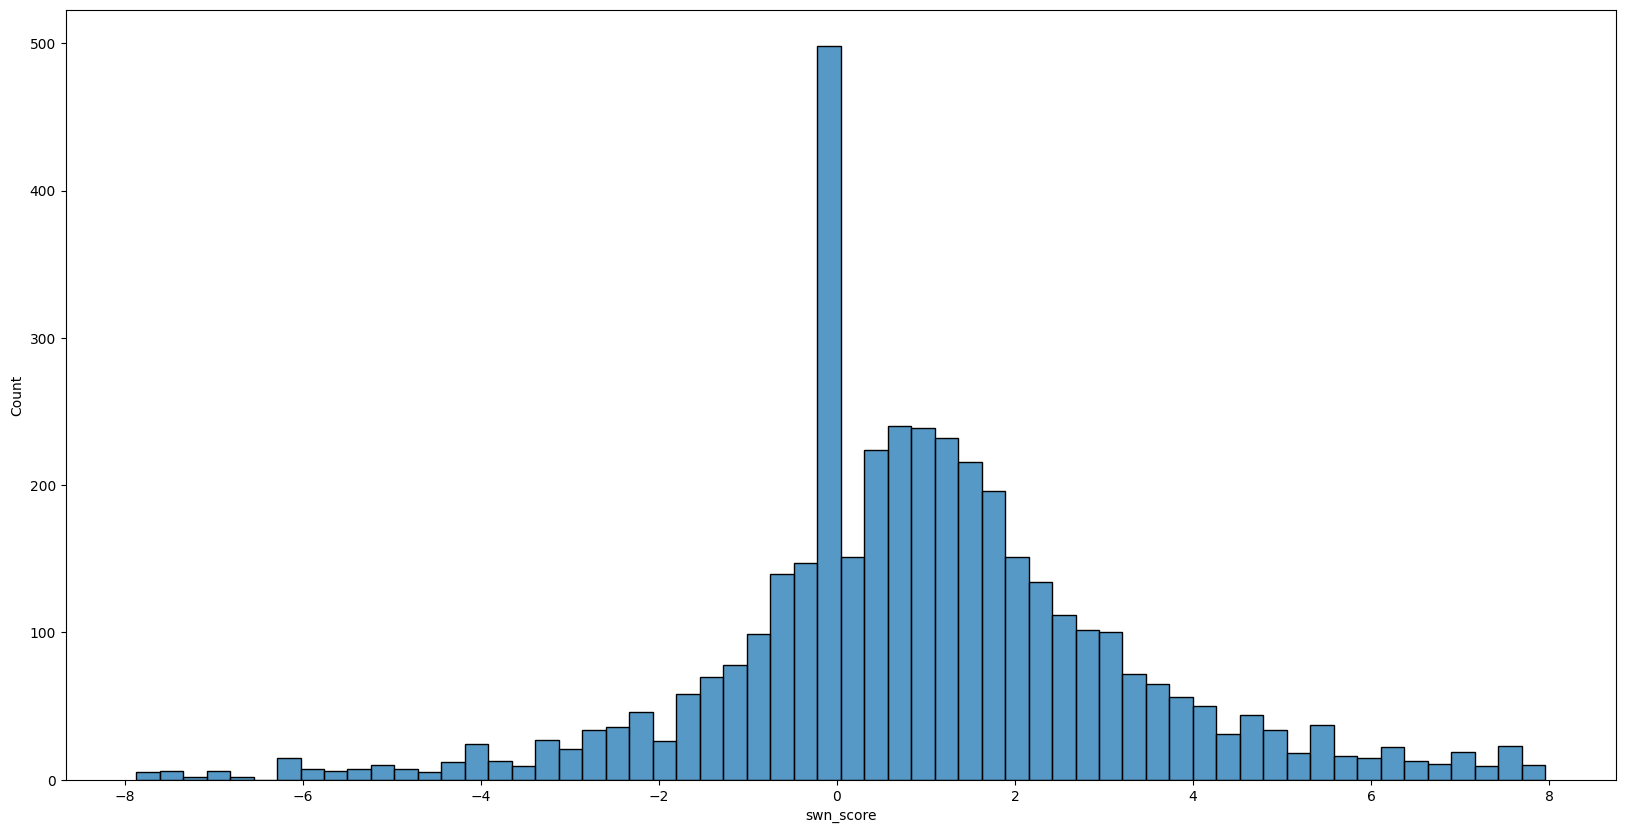

In [95]:
fig , ax = plt.subplots(nrows=1, ncols=1, figsize=(20,10))
sns.histplot(x='swn_score', data=reviews.query("swn_score < 8 and swn_score > -8"), ax=ax)
plt.show()

In [96]:
reviews['swn_sentiment'] = reviews['swn_score'].apply(lambda x: "positive" if x>1 else ("negative" if x<0.5 else "neutral"))

In [97]:
reviews['swn_sentiment'].value_counts(dropna=False)

swn_sentiment
positive    2217
negative    1815
neutral      464
Name: count, dtype: int64

<Axes: xlabel='overall', ylabel='count'>

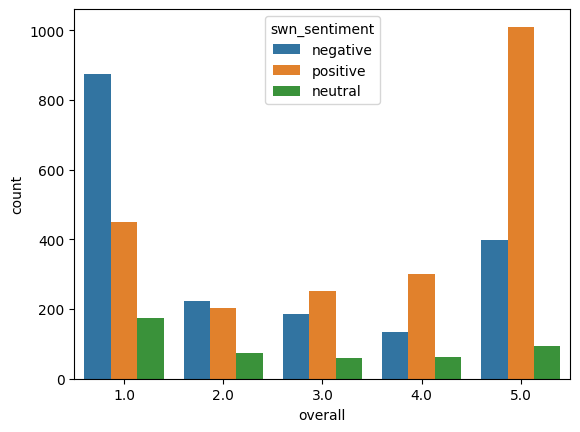

In [98]:
sns.countplot(x='overall', hue='swn_sentiment' ,data = reviews)

<Axes: xlabel='swn_sentiment', ylabel='overall'>

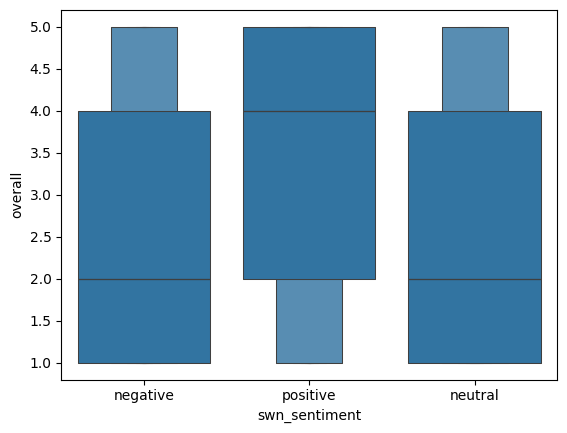

In [99]:
sns.boxenplot(x='swn_sentiment', y='overall', data = reviews)

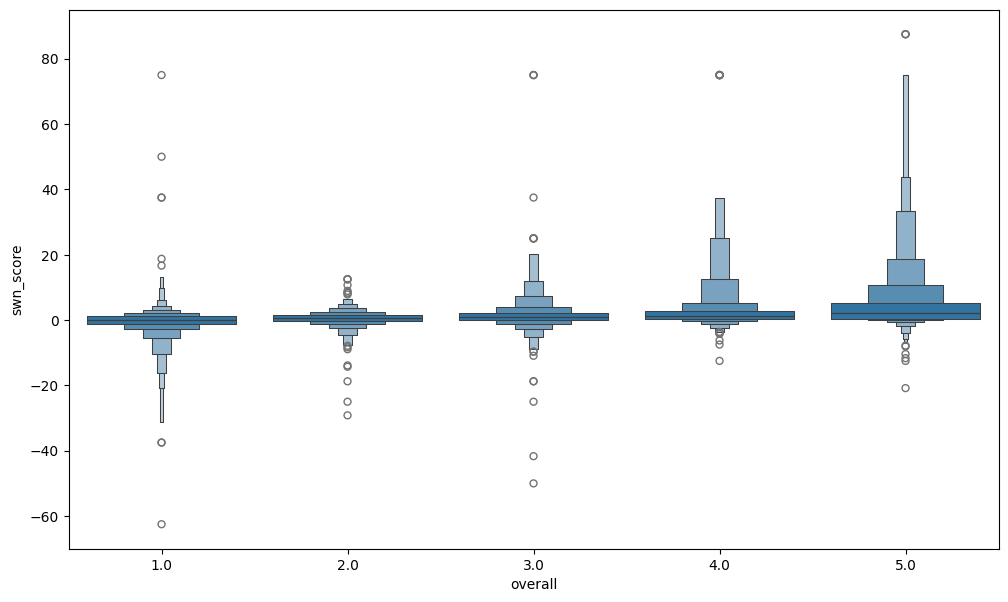

In [100]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (12,7))
sns.boxenplot(x='overall', y='swn_score', data = reviews, ax=ax)
plt.show()

In [101]:
reviews['true_sentiment'] = \
    reviews['overall'].apply(lambda x: "positive" if x>=4 else ("neutral" if x==3 else "negative"))

In [102]:
y_swn_pred, y_true = reviews['swn_sentiment'].tolist(), reviews['true_sentiment'].tolist()

In [103]:
len(y_swn_pred), len(y_true)

(4496, 4496)

## Performance Assessment

### Negative Sentiment Prediction Assessment

In [106]:
tp, tn, fp, fn = 1088, 70+242+142+1310, 265+647, 188+547

In [107]:
recall = tp / (tp+fn)
specifity = tn / (tn+fp)
precision = tp/(tp+fp)
f1 = (2*tp) / (2*tp + fp + fn)

In [108]:
print("recall: {}\nprecission: {}\nf1 score: {}".format(recall, precision, f1))

recall: 0.5968184311574328
precission: 0.544
f1 score: 0.5691865027465342


### Positive Sentiment Prediction Assessment

In [109]:
tp, tn, fp, fn = 1310, 1088+265+70+188, 242+647, 142+547

In [110]:
recall = tp / (tp+fn)
specifity = tn / (tn+fp)
precision = tp/(tp+fp)
f1 = (2*tp) / (2*tp + fp + fn)

In [111]:
print("recall: {}\nprecission: {}\nf1 score: {}".format(recall, precision, f1))

recall: 0.655327663831916
precission: 0.5957253296953161
f1 score: 0.6241067174845164


## Sentiment Scoring Model Using NLTK Opinion Lexicon

In [112]:
import nltk
from nltk.corpus import opinion_lexicon
from nltk.tokenize import word_tokenize, sent_tokenize

In [113]:
nltk.download("opinion_lexicon")

[nltk_data] Downloading package opinion_lexicon to
[nltk_data]     C:\Users\kumar\AppData\Roaming\nltk_data...
[nltk_data]   Package opinion_lexicon is already up-to-date!


True

In [114]:
pos_words = list(opinion_lexicon.positive())
neg_words = list(opinion_lexicon.negative())

In [115]:
def get_sentiment_score_oplex(text):
    
    """
        This method returns the sentiment score of a given text using nltk opinion lexicon.
        input: text
        output: numeric (double) score, >0 means positive sentiment and <0 means negative sentiment.
    """    
    total_score = 0

    raw_sentences = sent_tokenize(text)
    
    for sentence in raw_sentences:

        sent_score = 0     
        sentence = str(sentence)
        sentence = sentence.replace("<br />"," ").translate(str.maketrans('','',punctuation)).lower()
        tokens = TreebankWordTokenizer().tokenize(text)
        for token in tokens:
            sent_score = sent_score + 1 if token in pos_words else (sent_score - 1 if token in neg_words else sent_score)
        total_score = total_score + (sent_score / len(tokens))

    
    return total_score

In [116]:
reviews['oplex_sentiment_score'] = reviews['reviewText'].apply(lambda x: get_sentiment_score_oplex(x))

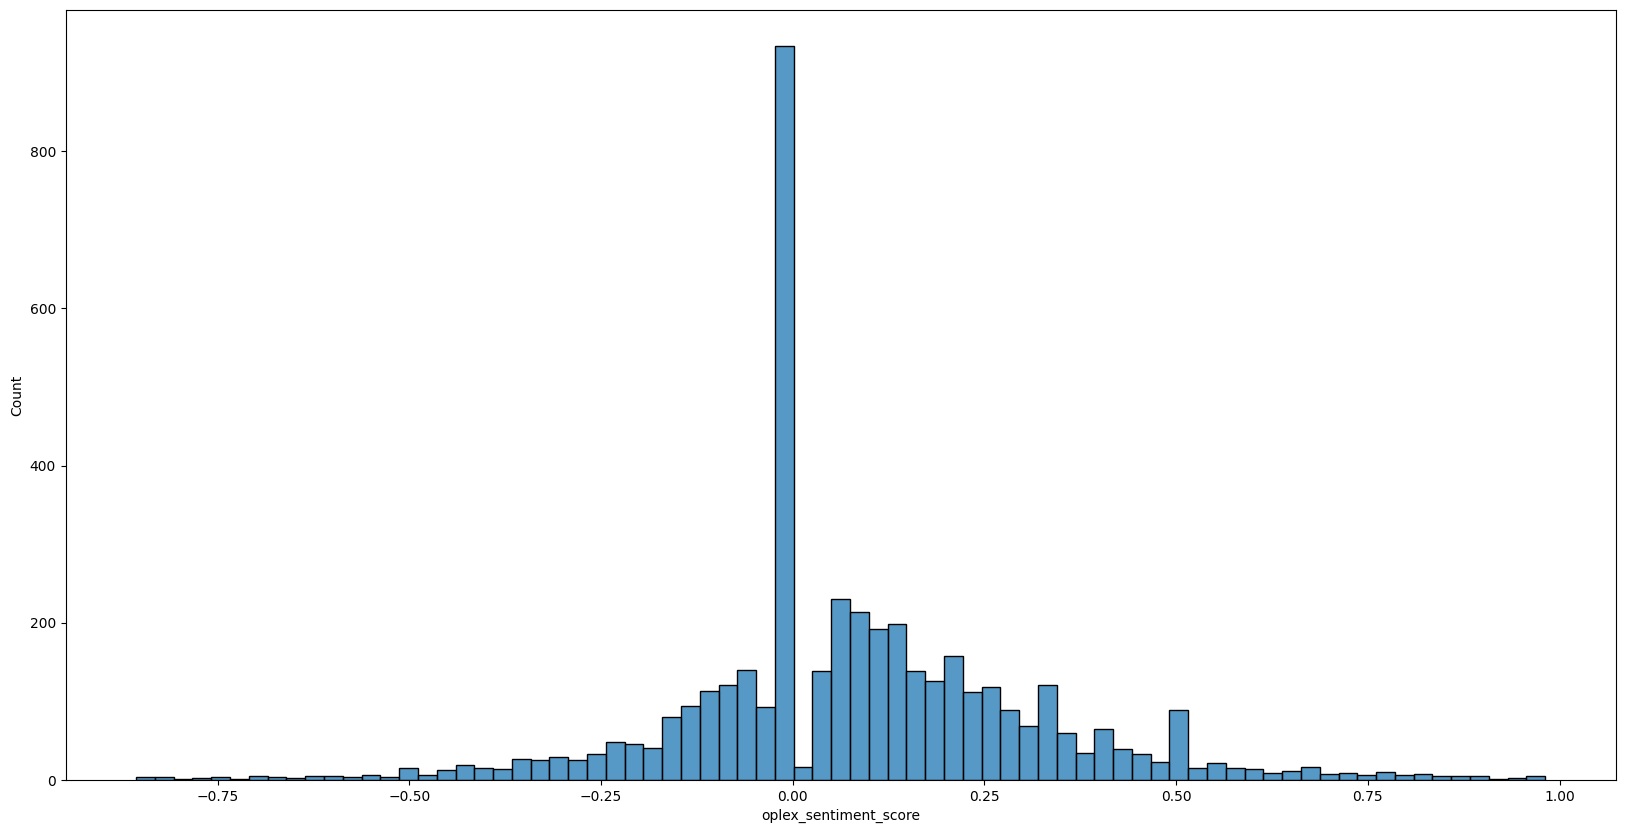

In [117]:
fig , ax = plt.subplots(nrows=1, ncols=1, figsize=(20,10))
sns.histplot(x='oplex_sentiment_score',\
             data=reviews.query("oplex_sentiment_score < 1 and oplex_sentiment_score>-1"), ax=ax)
plt.show()

In [118]:
reviews['oplex_sentiment'] = \
    reviews['oplex_sentiment_score'].apply(lambda x: "positive" if x>0.1 else ("negative" if x<0 else "neutral"))

In [119]:
reviews['oplex_sentiment'].value_counts(dropna=False)

oplex_sentiment
positive    1891
neutral     1547
negative    1058
Name: count, dtype: int64

<Axes: xlabel='overall', ylabel='count'>

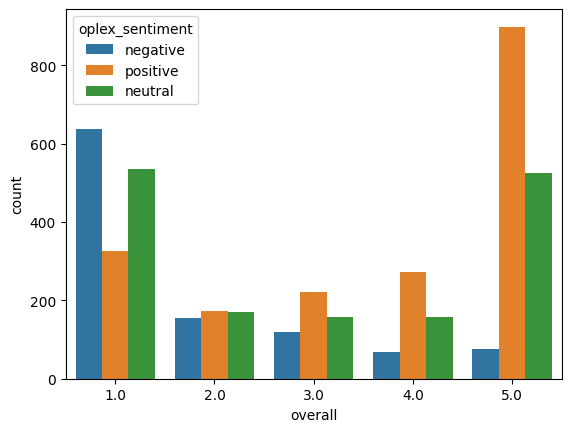

In [120]:
sns.countplot(x='overall', hue='oplex_sentiment' ,data = reviews)

<Axes: xlabel='oplex_sentiment', ylabel='overall'>

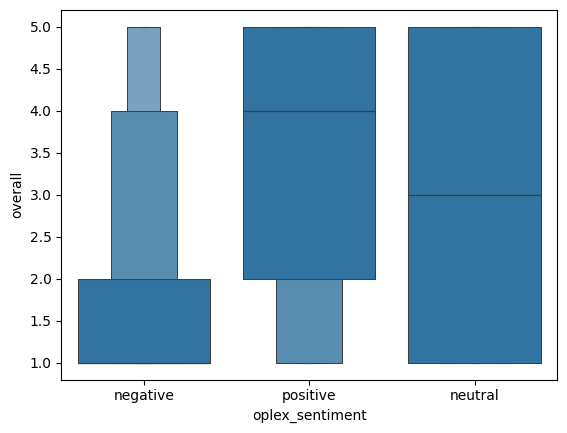

In [121]:
sns.boxenplot(x='oplex_sentiment', y='overall', data = reviews)

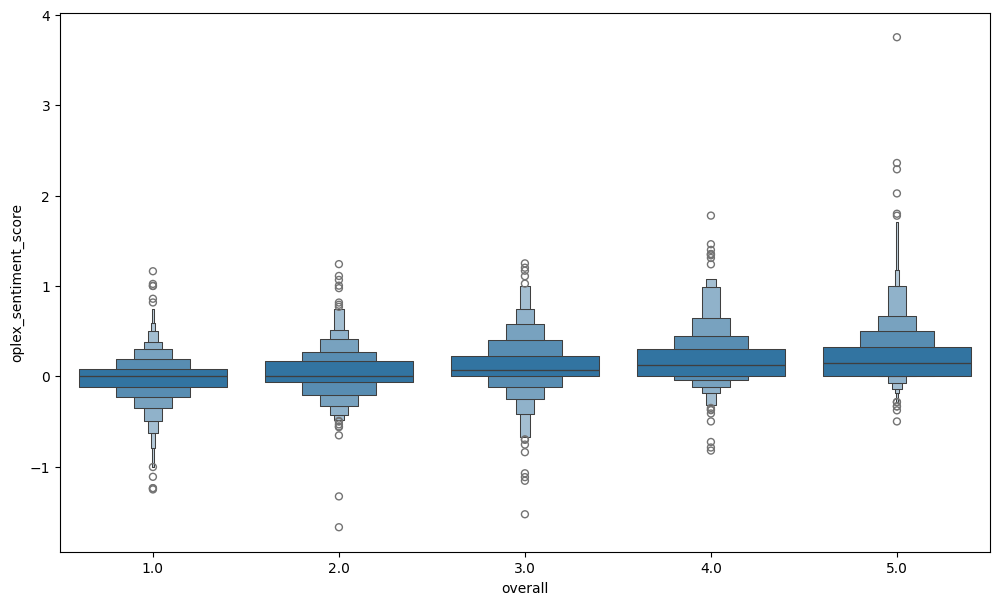

In [122]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (12,7))
sns.boxenplot(x='overall', y='oplex_sentiment_score', data = reviews, ax=ax)
plt.show()

In [123]:
y_oplex_pred = reviews['oplex_sentiment'].tolist()

### Negative Label Assessment

In [127]:
tp, tn, fp, fn = 804, 195+199+686+1181, 106+132, 701+495

In [ ]:
recall = tp / (tp+fn)
specifity = tn / (tn+fp)
precision = tp/(tp+fp)
f1 = (2*tp) / (2*tp + fp + fn)

print("recall: {}\nprecission: {}\nf1 score: {}".format(recall, precision, f1))

recall: 0.402
precission: 0.7715930902111324
f1 score: 0.5285996055226825


### Positive Label Assessment

In [128]:
tp, tn, fp, fn = 1181, 804+701+106+195, 495+199, 132+686

In [129]:
recall = tp / (tp+fn)
specifity = tn / (tn+fp)
precision = tp/(tp+fp)
f1 = (2*tp) / (2*tp + fp + fn)

print("recall: {}\nprecission: {}\nf1 score: {}".format(recall, precision, f1))

recall: 0.5907953976988495
precission: 0.6298666666666667
f1 score: 0.6097057305110997
